## 6.5 Unsupervised Machine Learning 

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [80]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [81]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement 6/Analysis'

In [82]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'insurance_categories.csv'), index_col=False)

In [83]:
df.shape

(1337, 11)

In [84]:
df.head()

,Unnamed: 0.1,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,age category,bmi category
0,0,0,19,female,27.900,0,yes,southwest,16884.92400,young adult,overweight
1,1,1,18,male,33.770,1,no,southeast,1725.55230,young adult,obese
2,2,2,28,male,33.000,3,no,southeast,4449.46200,young adult,obese
3,3,3,33,male,22.705,0,no,northwest,21984.47061,young adult,healthy weight
4,4,4,32,male,28.880,0,no,northwest,3866.85520,young adult,overweight


In [85]:
# dropping unwanted columns:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [86]:
df.head()


,age,sex,bmi,children,smoker,region,charges,age category,bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,young adult,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young adult,obese
2,28,male,33.000,3,no,southeast,4449.46200,young adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,young adult,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,young adult,overweight


In [87]:
# Creating a subset with only numerical columns

df_num = df[['age', 'bmi', 'children', 'charges']]

In [88]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### 2. The elbow technique

In [90]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [91]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of

[-195939158682.99286,
 -47969960260.4719,
 -22937021892.502098,
 -12118189115.397701,
 -8534550402.923561,
 -6164408565.818456,
 -4434593711.863405,
 -3488822577.067566,
 -2770726148.7236986]

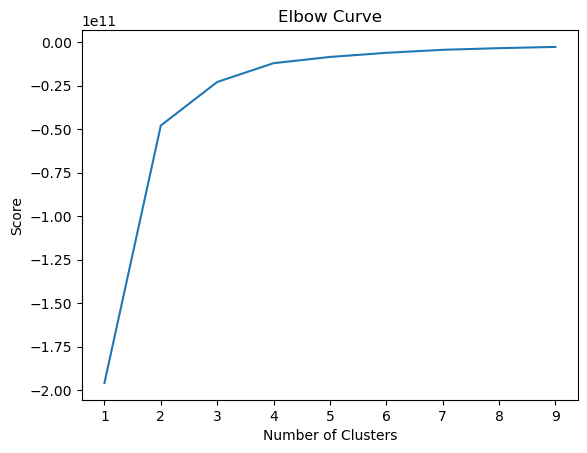

In [92]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there are large jumps from one to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [148]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [150]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [152]:
df['clusters'] = kmeans.fit_predict(df_num)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [154]:
df_num['clusters'] = kmeans.fit_predict(df_num)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_52590/1773540400.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age category,bmi category,clusters,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,young adult,overweight,2,purple
1,18,male,33.770,1,no,southeast,1725.55230,young adult,obese,0,pink
2,28,male,33.000,3,no,southeast,4449.46200,young adult,obese,0,pink
3,33,male,22.705,0,no,northwest,21984.47061,young adult,healthy weight,2,dark pink
4,32,male,28.880,0,no,northwest,3866.85520,young adult,overweight,0,pink


In [158]:
df_num.head()

,age,bmi,children,charges,clusters
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,0


In [160]:
df['clusters'].value_counts()

clusters
0    872
2    303
1    162
Name: count, dtype: int64

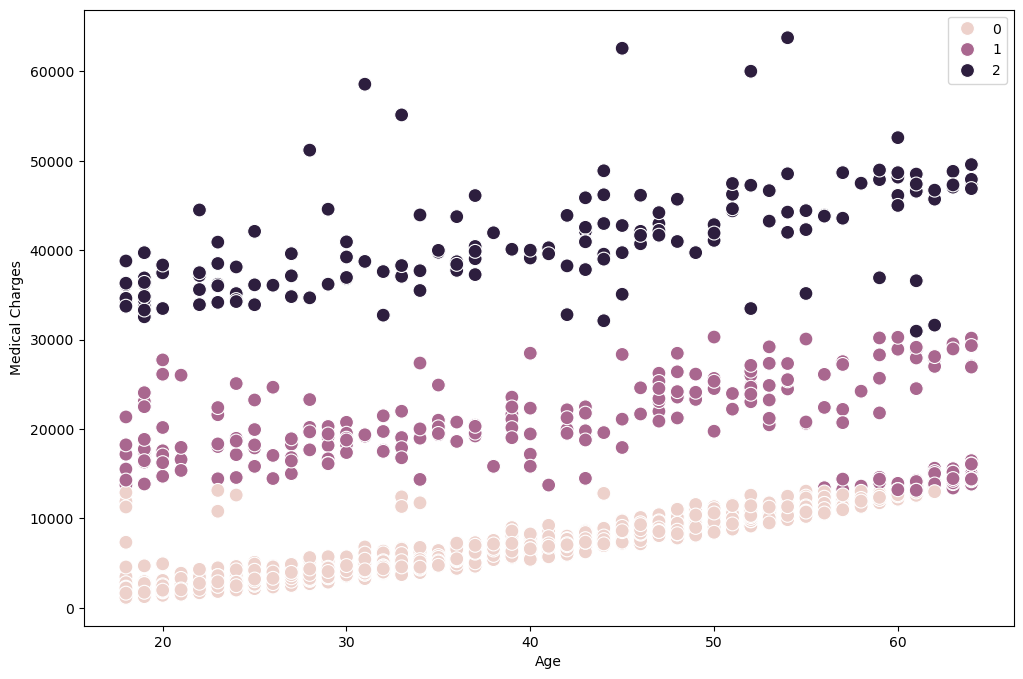

In [162]:
# Plot the clusters for the "charges" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['age'], y=df['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Medical Charges') # Label y-axis.
plt.show()

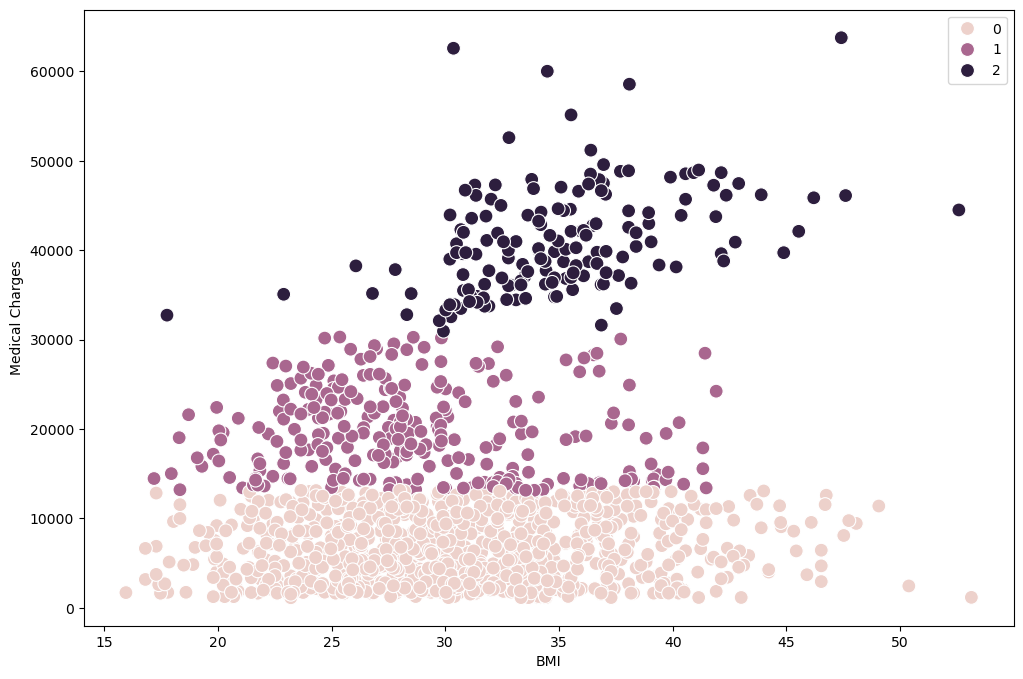

In [164]:
# Plot the clusters for the "BMI" and "Charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['bmi'], y=df['charges'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('BMI') 
plt.ylabel('Medical Charges') 
plt.show()

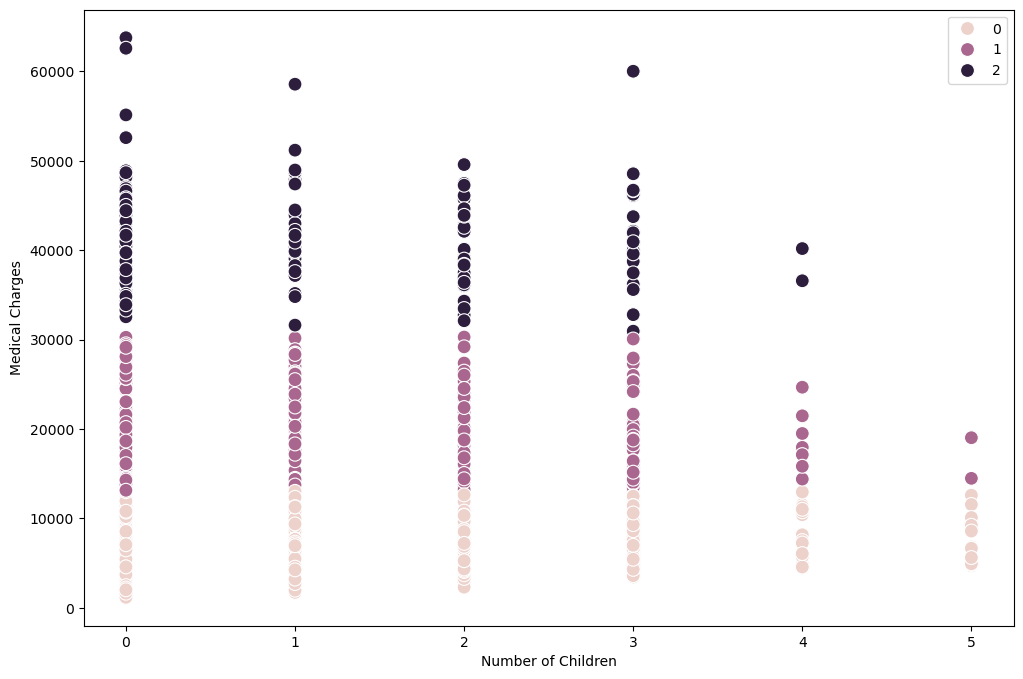

In [166]:
# Plot the clusters for the "Number of children" and "Charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['children'], y=df['charges'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Children') 
plt.ylabel('Medical Charges') 
plt.show()

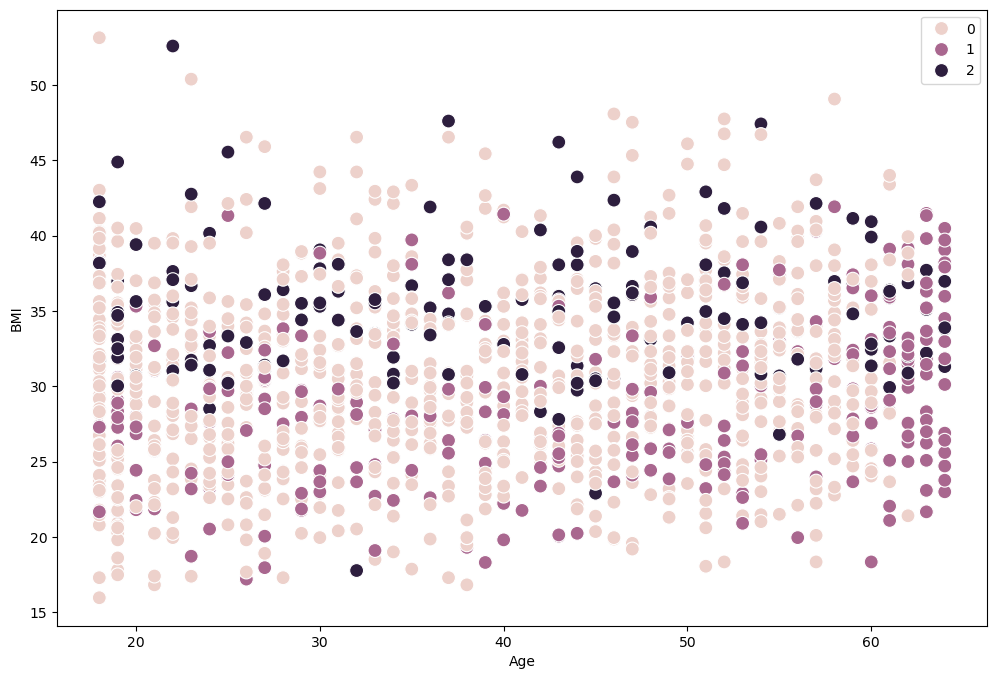

In [168]:
# Plot the clusters for the "BMI" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['age'], y=df['bmi'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('BMI') 
plt.show()

In [170]:
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [172]:
df.groupby('cluster').agg({'age':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'children':['mean', 'median'],
                          'charges':['mean', 'median']})

age               bmi           children         \
                mean median       mean   median      mean median   
cluster                                                            
dark pink  40.376543   42.0  34.845432  34.6500  1.166667    1.0   
pink       36.823394   37.0  30.423314  30.1075  1.089450    1.0   
purple     45.508251   49.0  29.118630  28.0250  1.075908    1.0   

                charges                
                   mean        median  
cluster                                
dark pink  40761.308558  39854.111650  
pink        6329.576617   6126.183125  
purple     18585.685252  17942.106000

In [174]:
import plotly.express as px

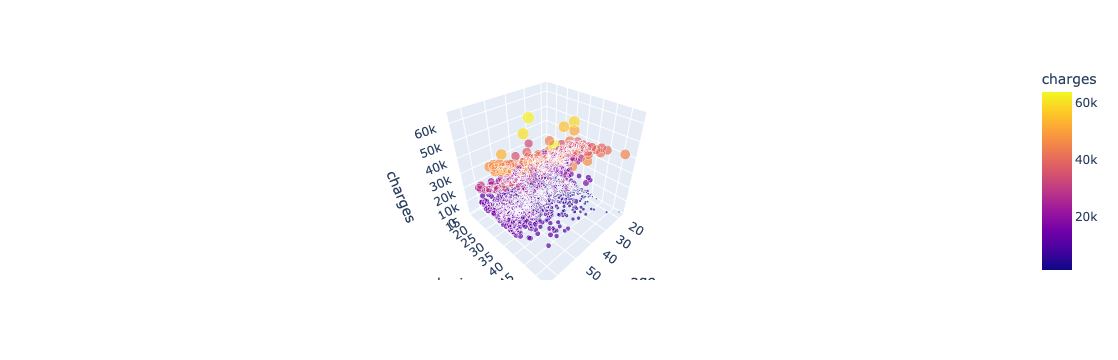

In [109]:
# Create the 3D scatter plot
fig = px.scatter_3d(df, x='age', y='bmi', z='charges',
              color='charges', size='charges')

fig.show()

## Exporting file

In [176]:
df.to_csv(os.path.join(path, 'Prepared Data', 'insurance_complete-3.csv'))

## Conclusions: 

### It seems that the main difference between the pink and the purple clusters is bmi.

### They have similar age means and medians, but very different bmi means and medians, with the purple cluster having a significantly higher average bmi.

### The pink cluster has significantly higher medical charges than the purple cluster (83% higher, or 1.8 times).

### For similar ages, higher bmi correlates with higher medical charges.
### On the other hand, It seems that the main difference between the dark purple and the dark pink clusters is age. 
### They have similar bmi means and medians, but very different age means and medians, with the dark purple cluster having a significantly higher BMI.
### The dark purple cluster has significantly higher medical charges than the dark pink cluster (167% higher, or 2.7 times).
### For similar bmi, heavier weights correlates with higher medical charges.
### The number of children doesn't seem to influence medical charges.
### The relationship between age, BMI, and medical charges could be influenced by other factors not shown in the plots, such as smoking status.
